In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.proportion as sst
import statsmodels.formula as sm

In [2]:
df = pd.read_csv(r'C:\Users\SRK\Desktop\statistics\Day 2\cs1.csv')

In [3]:
df.head()

,id,age,gender,region,income,married,children,car,save_act,current_act,mortgage,pl
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [4]:
comparing two catagories.
PS : is there any association between region and PI status
    

SyntaxError: invalid syntax (<ipython-input-4-ca5fa4bc694c>, line 1)

In [5]:
table = pd.crosstab(df['region'],df['pl'])
table

pl,NO,YES
region,,
INNER_CITY,85,70
RURAL,26,28
SUBURBAN,14,11
TOWN,57,39


In [6]:
stats.chi2_contingency(table)

(1.776514811293037, 0.6200588623676881, 3, array([[85.48484848, 69.51515152],
        [29.78181818, 24.21818182],
        [13.78787879, 11.21212121],
        [52.94545455, 43.05454545]]))

In [7]:
genderpl = pd.crosstab(df['gender'],df['pl'])
genderpl

pl,NO,YES
gender,,
FEMALE,98,62
MALE,84,86


In [8]:
stats.chi2_contingency(genderpl,correction =False)# 2*2 matrix.

(4.670073070808359, 0.03069262159535539, 1, array([[88.24242424, 71.75757576],
        [93.75757576, 76.24242424]]))

In [9]:
sst.proportions_ztest([62,86],[160,170])


(-2.1610351850000873, 0.03069262159535531)

fit of goodness

In [10]:
H0: it is fit for goodness

SyntaxError: invalid syntax (<ipython-input-10-6fb94ed00f93>, line 1)

In [11]:
rand_table_obs = np.array([19,21,18,22,20])
rand_table_exp = np.array([20,20,20,20,20])



In [12]:
o_diff_e_square = (rand_table_obs-rand_table_exp)**2
chi_stat =o_diff_e_square/rand_table_exp
chi_ststf =chi_stat.sum()

In [13]:
chi_critical = stats.chi2.isf(0.05,4)
chi_critical

9.487729036781158

In [14]:
since chi_stat< chicritical accept null hypothesis.

SyntaxError: invalid syntax (<ipython-input-14-a8511f94aa0f>, line 1)

In [15]:
pvalue =stats.chi2.sf(chi_ststf,4)
pvalue

0.9735009788392561

In [16]:
stats.chisquare(rand_table_obs,rand_table_exp)

Power_divergenceResult(statistic=0.5, pvalue=0.9735009788392561)

In [17]:
A = np.array([5,4,3])
B = np.array([10,12,14])
C = np.array([15,14,16])
stats.f_oneway(A,B,C)

F_onewayResult(statistic=48.499999999999766, pvalue=0.00019767059842028516)

In [18]:
pip install pydataset


The following command must be run outside of the IPython shell:

    $ pip install pydataset

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [19]:
from pydataset import data

initiated datasets repo at: C:\Users\SRK\.pydataset/


In [22]:
cw =data('chickwts')

In [23]:
cw.head()

,weight,feed
1,179,horsebean
2,160,horsebean
3,136,horsebean
4,227,horsebean
5,217,horsebean


In [25]:
cw.shape

(71, 2)

In [28]:
cw.feed.value_counts()

soybean      14
casein       12
linseed      12
sunflower    12
meatmeal     11
horsebean    10
Name: feed, dtype: int64

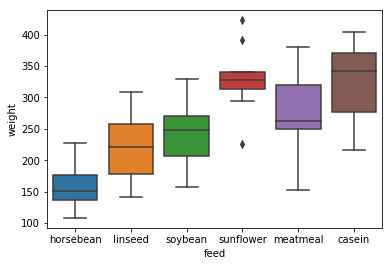

In [31]:
sns.boxplot(y = 'weight',x = 'feed',data =cw)

In [33]:
cw.groupby('feed').describe()

weight                                                            
           count        mean        std    min     25%    50%     75%    max
feed                                                                        
casein      12.0  323.583333  64.433840  216.0  277.25  342.0  370.75  404.0
horsebean   10.0  160.200000  38.625841  108.0  137.00  151.5  176.25  227.0
linseed     12.0  218.750000  52.235698  141.0  178.00  221.0  257.75  309.0
meatmeal    11.0  276.909091  64.900623  153.0  249.50  263.0  320.00  380.0
soybean     14.0  246.428571  54.129068  158.0  206.75  248.0  270.00  329.0
sunflower   12.0  328.916667  48.836384  226.0  312.75  328.0  340.25  423.0

In [35]:
horsebean = cw[cw['feed']=='horsebean']['weight']
casein = cw[cw['feed']=='casein']['weight']
linseed = cw[cw['feed']=='linseed']['weight']
meatmeal = cw[cw['feed']=='meatmeal']['weight']
soybean = cw[cw['feed']=='soybean']['weight']
sunflower = cw[cw['feed']=='sunflower']['weight']



H0: means of all cat are same.
H1 .: means are not same
one way Anova.

In [36]:
stats.f_oneway(horsebean,casein,linseed,meatmeal,soybean,sunflower)

F_onewayResult(statistic=15.364799774712534, pvalue=5.936419853471331e-10)

In [ ]:
pvalue < aplha , so reject H0.


In [37]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [38]:
pairwise_tukeyhsd(cw['weight'],cw['feed']).summary()

group1,group2,meandiff,lower,upper,reject
casein,horsebean,-163.3833,-232.3445,-94.4222,True
casein,linseed,-104.8333,-170.5852,-39.0814,True
casein,meatmeal,-46.6742,-113.9039,20.5554,False
casein,soybean,-77.1548,-140.5149,-13.7947,True
casein,sunflower,5.3333,-60.4186,71.0852,False
horsebean,linseed,58.55,-10.4112,127.5112,False
horsebean,meatmeal,116.7091,46.3375,187.0806,True
horsebean,soybean,86.2286,19.544,152.9132,True
horsebean,sunflower,168.7167,99.7555,237.6778,True
linseed,meatmeal,58.1591,-9.0705,125.3887,False


In [41]:
stats.f.isf(0.05,2,2)

18.999999999999982

In [42]:
df = pd.DataFrame({'Age':[5,10,15,4,12,14,3,14,16],'Centers':['A','B','C','A','B','C','A','B','C'],'batch':['D','D','D',
                                                                  'E','E','E','F','F','F']})
df

,Age,Centers,batch
0,5,A,D
1,10,B,D
2,15,C,D
3,4,A,E
4,12,B,E
5,14,C,E
6,3,A,F
7,14,B,F
8,16,C,F


In [46]:
#import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [48]:
model =ols('Age~Centers+batch',data =df).fit()
annova_table = anova_lm(model)
annova_table

,df,sum_sq,mean_sq,F,PR(>F)
Centers,2.0,194.0,97.0,38.8,0.002403
batch,2.0,2.0,1.0,0.4,0.694444
Residual,4.0,10.0,2.5,NaN,NaN


In [ ]:
Age is dependent on batches and independent on centers in population.